**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData]<br>(https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()           

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
data.shape

(1340, 7)

In [5]:
#Droping the CASENUM column
data.drop(['CASENUM'],axis = 1,inplace = True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [6]:
data.shape

(1340, 6)

In [7]:
#checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
#checking the missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [9]:
##data['CLMSEX'] = data['CLMSEX'].fillna()

In [10]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [11]:
data.CLMSEX.value_counts().index[0]

1.0

In [12]:
data.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [13]:
data.CLMINSUR.value_counts().index[0]

1.0

In [14]:
# Creating a user-defined function for imputing the missing values
# with mode(numerical & categorical data)
#lambda argument:expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

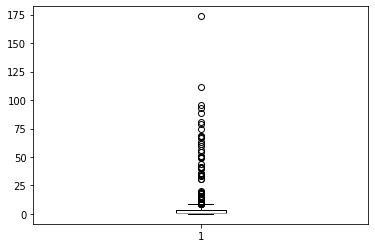

In [15]:
#Loss column # Datapoint<Q
plt.boxplot(data.LOSS)
plt.show()

--> Data Entry mistake
1. Outliers also missing values --> Imputation
2. Winsorization--> Outlier are replaced with next small value 
Example:[1,2,3,4,5,6,78,89,9000]--> 9000 as an outlier --> 9000 will be replaced with 89<br>
One analysis--> including outliers<br>
One analysis--> drop all the outliers

In [16]:
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [17]:
# iloc-row indices,column indices
data.iloc[1:,1:] # indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [18]:
#Split the data into Input and Output bcoz we cannot pass the entire data into logistic Regression
X = data.iloc[:,1:]
y = data.ATTORNEY
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [19]:
#Split the data into training and testing
#build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [20]:
#Build the classifier on training data
# Sklearn library : import , instantiate, fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train) #Input and Output will be passed to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Predicting on train data
# Syntax : objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [22]:
#y_tarin(Actual values) ==  y_train_pred(Predicted values)

In [23]:
y_train == y_train_pred

744      True
363      True
10       True
971      True
634      True
        ...  
715     False
905     False
1096     True
235     False
1061     True
Name: ATTORNEY, Length: 938, dtype: bool

In [24]:
# Confusion matrix for training data 
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[315, 170],
       [108, 345]], dtype=int64)

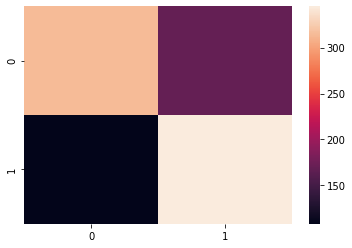

In [25]:
sns.heatmap(conf)

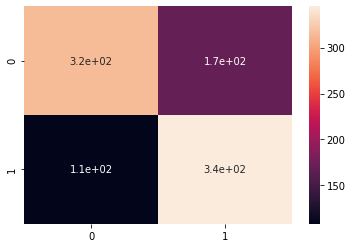

In [26]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True)

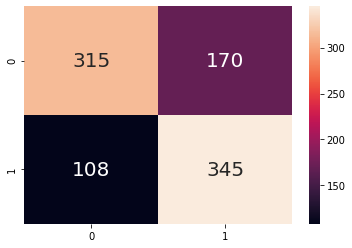

In [27]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt='3.0f', annot_kws={'size':'20'})

In [29]:

print("true_negative=",conf[0][0]) # True Negative-->Actual Value is Not Hiring Attorney(0) and Predicted Value is Not Hiring Attorney(0)

print("false_positive=",conf[0][1]) #False Positive-->Actual Value is Not Hiring Attorney()0 and Predicted Value is Hiring Attorney(1)

print("false_negative = ",conf[1][0]) #False Negative--> Actual value is Hiring Attorney(1) and Predicted Value is Not Hiring Attorney(0)

print("true_positive =", conf[1][1])

true_negative= 315
false_positive= 170
false_negative =  108
true_positive = 345


In [ ]:
(315+345)/(315+170+108+345)

In [ ]:
accuracy_score(y_train, y_train_pred)

In [ ]:
# Hiring Attorney-->1 and Not Hiring Attorney--> 0

true_negative=conf[0][0] # True Negative-->Actual Value is Not Hiring Attorney(0) and Predicted Value is Not Hiring Attorney(0)

false_positive=conf[0][1] #False Positive-->Actual Value is Not Hiring Attorney()0 and Predicted Value is Hiring Attorney(1)

false_negative = conf[1][0] #False Negative--> Actual value is Hiring Attorney(1) and Predicted Value is Not Hiring Attorney(0)

true_positive = conf[1][1] # True Positive--> Actual Value is Hiring Attorney(1) and Predicted Value is Hiring Attorney(1)

In [ ]:
## Precision 
Precision = true_positive/(true_positive+false_positive)
Precision

In [ ]:
# Precision 
# Syntax: precision_score(actualValues, predictedValues)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

In [ ]:
# Out of all the actual values, how many are correctly classified
Recall = true_positive/(true_positive+false_negative)
print(Recall)

# Recall calculated by using a function
recall_score(y_train, y_train_pred)


In [ ]:
# Calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)  # f1_score(Actual Values, Predicted values)

In [ ]:
# Prediction on Test Data
# Calculate the metrics for test data--> confusion matrix, Precision, Recall, F1-Score
# Comapre the score with training data

In [ ]:
# Data Preprocessing Steps
# Visualize all the columns in your
# Correlation
# Make a proper documentation of all the steps whichever performing on dataset

In [31]:
from sklearn.metrics import classification_report
#Syntax : classification_report(actualValues, predictedValues)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       485
           1       0.67      0.76      0.71       453

    accuracy                           0.70       938
   macro avg       0.71      0.71      0.70       938
weighted avg       0.71      0.70      0.70       938

